##Veriyi Anlama ve Hazırlama

In [ ]:
#Gerekli kütüphane yüklemeleri
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
admission_path = "/content/drive/MyDrive/ml/4_hafta/datasets/Admission_Predict.csv"
df = pd.read_csv(admission_path)

Veri setimizin yüklemesi tamamlandıktan sonra içeriği hakkında bir fikir edinmek için birkaç satırını görüntüleyelim


In [ ]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Ben genellikle deafult olan 5 satırı değil de 10 satırı görüntülemeyi tercih ediyorum.


In [ ]:
df.shape

(400, 9)

İlk bakışta gözüme çarpan şeyler hakkında şöyle yorum yapabilirim

 -Serial no featureu çıkarılabilir. Makine öğrenmesi modelimizin kullanacağı hiçbir şeyi barındırmıyor.

-Bazı score değerleri var ve bunların chance of admit değişkenine etkileri oldukça fazla diye düşünüyorum.

-Rating kolonunun sayılandırması hakkında as üst ilişkisi olduğunu düşünüyorum ve bu benim için iyi çünkü kategorik olarak değil sayısal olarak ifade edilmiş.

Şimdi eksik değerlerimiz var mı diye bakalım ve varsa onları temizleyelim(eğer yüzdesi çok yüksekse) veya dolduralım.

In [ ]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Eksik değerimiz hiç yok şanslıyız ki bu temiz bir veri setiymiş o yüzden eksik değerleri doldurmamız gerek yok.

In [ ]:
df.drop(columns=["Serial No."], inplace=True)

Serial No değişkenini silmeye karar verdim çünkü bu değişken sadece veri setindeki her gözlemi numaralandıran bir sütun olduğu için herhangi bir analizde anlamlı bir katkı sağlamayacaktır.

## Aykırı Değer Kontrolü
Aykırı değerlerimiz var mı, varsa ne kadar yer kaplıyorlar onları inceleyeceğim.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri belirleme
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Her değişkende kaç aykırı değer var


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 1
Research             0
Chance of Admit      2
dtype: int64


IQR yöntemini kullanarak aykırı değerleri belirledim ve oldukça az olduklarını gözlemledim. Bu sebeple silmek yerine onları alt üst sınır değerlerine çekeceğim. Bir de grafik üzerinden gözlemleyelim bu değerleri.

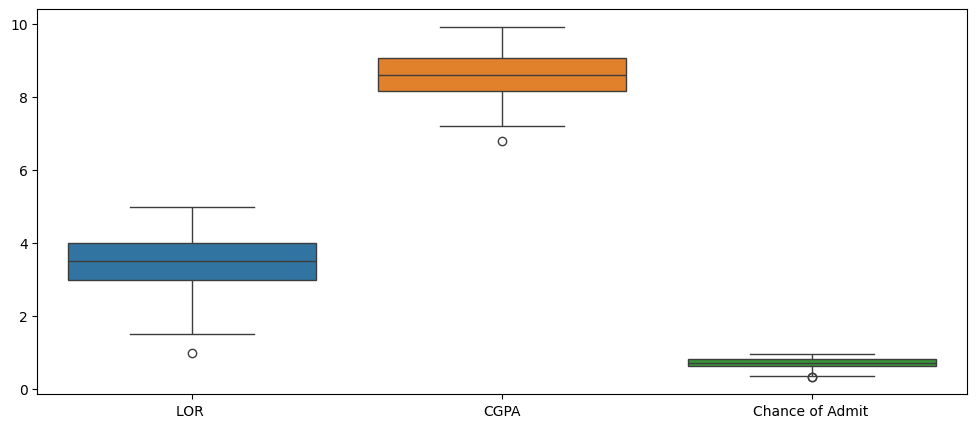

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['LOR ', 'CGPA', 'Chance of Admit ']])
plt.show()

Aslında bu aykırı değerlerin inanılmaz uçlarda olduğu bir grafik elde etmedik fakat ben yine de daha düzenli olması açısından ve hiçbir şeyi gözden kaçırmamak amacıyla bu değerleri sınıra çekme işlemi uygulayacağım

In [ ]:
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df


outlier_columns = ['LOR ', 'CGPA', 'Chance of Admit ']
df = cap_outliers(df, outlier_columns)

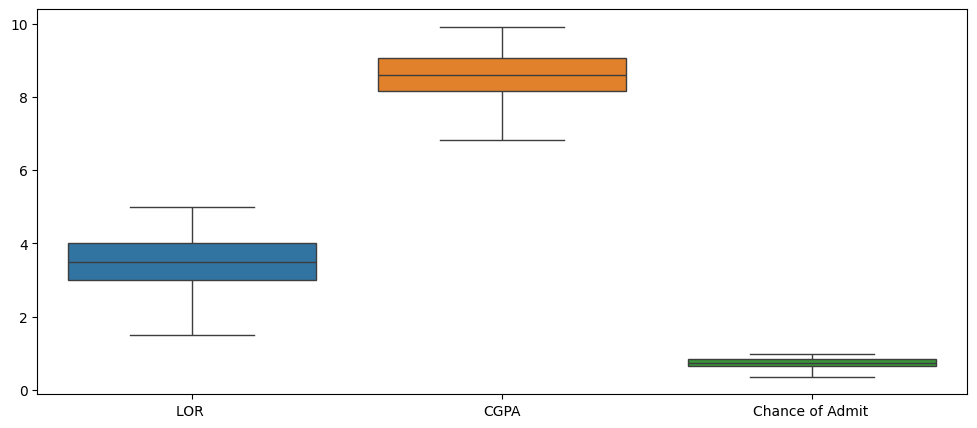

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['LOR ', 'CGPA', 'Chance of Admit ']])
plt.show()

Tekrardan grafiğimizi oluşturup gözlemledikten sonra oldukça temiz ve beklenen şekilde olan bir boxplotla karşılaşıyoruz.

Hedef değişkenimizi 0-1 aralığına sığdıralım

In [ ]:
df["Chance of Admit Binary"] = (df["Chance of Admit "] >= 0.75).astype(int)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit Binary
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


Artık bağımlı ve bağımsız değişkenlerimizi ayırabilir ve arından verimizi tarin ve test olarak bölmeye başlayabiliriz.

In [ ]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = (df['Chance of Admit Binary'] )

X bizim kullanılacak bağımsız değişkenlerimiz öğrencinin aldığı uanlar üniversitedki sıralaması gibi değişkenler y yani hedef değişkenimizi tahmin ederken kullanacağımız değişkenler

##Veriyi Eğitim ve Test Setlerine Bölme
Veriyi bölerken genel bir yaklaşım olan 80e 20 yaklaşımını kullanacağım. Verinin %80ini train için kullanıp %20sini de trainin ardından test için kullanacağım.
Standartlaştırm işlemini de veriyi böldükten sonra gerçekleştireceğim çünkü veri sızıntısı olması riskini istemiyorum.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler'ı oluştur
scaler = StandardScaler()

# Eğitim setine fit et ve dönüştür
X_train_scaled = scaler.fit_transform(X_train)

# Test setini sadece dönüştür (fit etmiyoruz!)
X_test_scaled = scaler.transform(X_test)

# Ölçeklendirilmiş verinin boyutlarını kontrol edelim
print(f"Scaled Train set: {X_train_scaled.shape}, Scaled Test set: {X_test_scaled.shape}")

Scaled Train set: (320, 7), Scaled Test set: (80, 7)


Verimizi test ve train olarak ayırdıktan sonra StandarScaler kullanarak veride standartlaştırma gerçekleştirdik. Artık verimiz lojistik regresyon modeliyle eğitilmeye hazır hale geldi.

##Modeli Eğitme


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Modeli oluştur
model = LogisticRegression()

# Modeli eğitim verisi üzerinde eğit
model.fit(X_train_scaled, y_train)

# Test verisi üzerinde tahmin yap
y_pred = model.predict(X_test_scaled)

# Sonuçları değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluk Oranı: {accuracy:.4f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Model Doğruluk Oranı: 0.9125

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



Elde ettiğimiz sonuçlar neticesinde şu yorumlar yapılabilir:

Modelin doğruluk oranı (accuracy) %91.25 yani model test verilerinin %91.25'ini doğru tahmin etmişve bu oldukça iyi bir performans sergilediğini göstermekte.

Precisionu incelediğimizde 0 ları tahmin etmekte oldukça başarılı olduğunu(%95) fakat 1 leri tahmin ederken bazılarnı yanlış tahmin ettiğini gözlemliyoruz.

Eğer 1 sınıfının yani kabul edilme şansısnın yanlış tahmin edilmesi kritikse precision’ı artırmak için daha fazla örnek farklı özellikler veya algoritmalar denenebilir

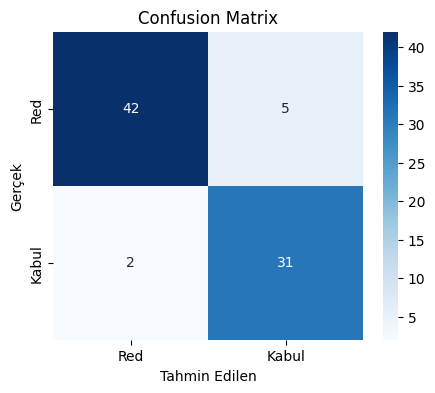

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Red", "Kabul"], yticklabels=["Red", "Kabul"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()

Bu confusion matrix modelin sınıflandırma performansını gösteriyor. Matris şu şekilde yorumlanabilir:

Gerçek "Red" Tahmin "Red" (True Negative - TN): 42
→ Model 42 örnekte "Red" olarak doğru tahminde bulunmuş.

Gerçek "Red" Tahmin "Kabul" (False Positive - FP): 5
→ Model 5 örnekte "Red" olması gereken veriyi yanlışlıkla "Kabul" olarak tahmin etmiş.

Gerçek "Kabul" Tahmin "Red" (False Negative - FN): 2
→ Model 2 örnekte "Kabul" olması gereken veriyi yanlışlıkla "Red" olarak tahmin etmiş.

Gerçek "Kabul" Tahmin "Kabul" (True Positive - TP): 31
→ Model 31 örnekte "Kabul" olarak doğru tahminde bulunmuş.


Model oldukça başarılı (%91.25 doğruluk).

Kabul sınıfı için duyarlılık (recall) yüksek (%93.9), yani "Kabul" olan örnekleri yakalamada iyi

Ancak precision (%86.1) biraz daha düşük yani yanlış pozitif tahminler var

Dengeyi iyileştirmek için eşik değeri değiştirilebilir veya daha fazla özellik eklenerek model geliştirilebilir

##Modelin Öğrenme Sürecini Takip Etme


In [ ]:
model = LogisticRegression(max_iter=100, tol=1e-4, solver='lbfgs', warm_start=True)


model.fit(X_train_scaled, y_train)


for i in range(len(model.n_iter_)):
    print(f"İterasyon {i+1}:")
    print(f"Ağırlıklar (W): {model.coef_}")
    print(f"Bias (b): {model.intercept_}\n")


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluk Oranı: {accuracy:.4f}")
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


print(f"\nToplam iterasyon sayısı: {model.n_iter_[0]}")
print(f"Modelin tolerans (tol) değerine ulaşıp ulaşmadığı: {model.n_iter_[0] < model.max_iter}")

İterasyon 1:
Ağırlıklar (W): [[0.71819706 0.34697665 0.30989686 0.42548922 0.25172306 1.75980632
  0.41157157]]
Bias (b): [-0.37805323]

Model Doğruluk Oranı: 0.9125

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80


Toplam iterasyon sayısı: 10
Modelin tolerans (tol) değerine ulaşıp ulaşmadığı: True


Bu kodda modelin 10 iterasyon için her iterasyondaki ağırlıklarını ve biasını gözlemliyoruz. Ardından modelimizin tol değerine ulaşıp ulaşmadığını kontrol ediyoruz. Eğer model.n_iter_[0] < model.max_iter ise model erken durmuştur.

##Sonuçları Yorumlama ve Modeli Geliştirme


Modelin en önemli değişkenlerini belirlemek için lojistik regresyonun ağırlıklarına (W) bakmalıyız.

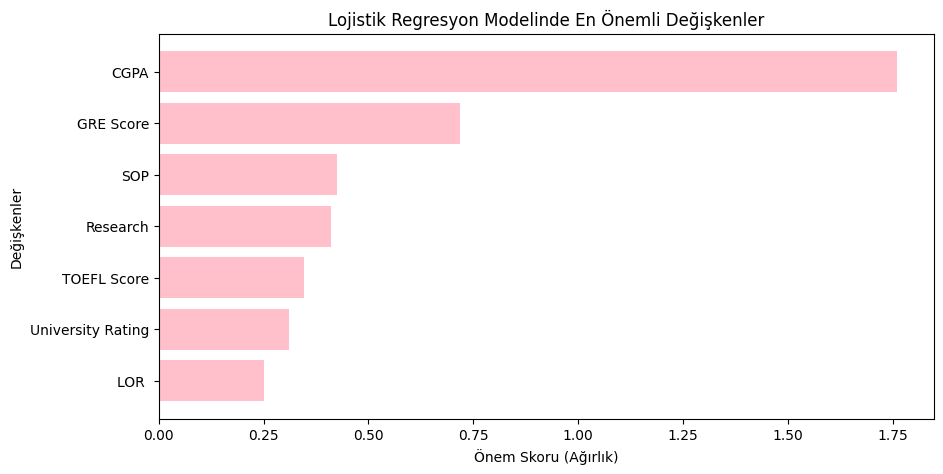

In [ ]:

# Modelin ağırlıkları
feature_importance = np.abs(model.coef_[0])

# Değişken isimleri
feature_names = X_train.columns

# Ağırlıkları büyükten küçüğe sıralayalım
sorted_idx = np.argsort(feature_importance)[::-1]
top_features = feature_names[sorted_idx]
top_importance = feature_importance[sorted_idx]

# En önemli 10 değişkeni gösterelim
plt.figure(figsize=(10, 5))
plt.barh(top_features[:10], top_importance[:10], color="pink")
plt.xlabel("Önem Skoru (Ağırlık)")
plt.ylabel("Değişkenler")
plt.title("Lojistik Regresyon Modelinde En Önemli Değişkenler")
plt.gca().invert_yaxis()
plt.show()


Modelin en önemli değişkenlerini gözlemlemek için bir grafik oluşturdum çünkü bu şekilde ilk bakışta bile hangi feature daha önemli hangisi 2. sırada öneme sahip bilgilerini hızlıca anlayabiliyoruz. Grafikten de gözlemlediğimiz üzere CGPA çok yüksek bir öneme sahipken onu GRE Score ve SOP takip etmekte.

Lojistik Regresyon modelinin threshold(eşik) değeri default olarak 0.5 fakat eğer bu threshold değerini değiştirisek sonuçlarımız acaba nasıl değişecek gözlemlemek için şu aşamları yaptım.

In [ ]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]

thresholds = [0.5,0.7, 0.8]

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    print(f"\n--- Eşik Değeri: {thresh} ---")
    print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_thresh))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))


--- Eşik Değeri: 0.5 ---
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

Confusion Matrix:
 [[42  5]
 [ 2 31]]

--- Eşik Değeri: 0.7 ---
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.94      0.91      0.92        33

    accuracy                           0.94        80
   macro avg       0.94      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80

Confusion Matrix:
 [[45  2]
 [ 3 30]]

--- Eşik Değeri: 0.8 ---
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1  

Eşik değerini 0.7 ye çektiğimiz zaman precision artıyor yani model yanlış pozitif tahminleri azaltıyor fakat recall biraz düşüyor yani model bazı gerçek pozitifleri kaçırıyor.

Sonuç olarak modelin daha kesin tahminler yaptığını ama bazı gerçek pozitifleri kaçırdığını söyleyebiliriz 0.5 eşik değerine kıyasla.


Eşik değerini 0.8 e çektiğimiz zaman öncelikle yanlış pozitif sayısının oldukça azaldığını gözlemliyoruz fakat recall biraz daha düştü 0.7ye kıyasla dha fazla gerçek pozitifleri kaçırıyor

Sonuç olarak model çok seçici hale geldi yanlış pozitifleri neredeyse yok etti ama bazı gerçek pozitifleri kaçırıyor.

Genel Sonuç

Düşük eşik değeri (0.5): Daha fazla doğru pozitif buluyor ama yanlış alarmlar daha fazla

Orta eşik değeri (0.7): Yanlış alarmlar azalıyor ama bazı pozitifler kaçırılıyor


Yüksek eşik değeri (0.8): Model neredeyse hiç yanlış pozitif yapmıyor ama bazı doğru pozitifleri kaçırıyor

Karar vermek için:

Risk kritikse (örneğin tıbbi teşhis): Düşük eşik kullanarak daha fazla olası hastayı yakalamak önemli olur

Yanlış pozitifler kritikse (örneğin dolandırıcılık tespiti): Yüksek eşik kullanarak yanlış alarmları en aza indirmek daha mantıklı olur